# Exercise: NEISS, Question Set C

#### Summary

The [National Electronic Injury Surveillance System](https://www.cpsc.gov/Safety-Education/Safety-Guides/General-Information/National-Electronic-Injury-Surveillance-System-NEISS) is a data product produced by the US Consumer Product Safety Commission. It tracks emergency room injuries related to consumer products (e.g., "a door fell on me!").

#### Files

- **nss15.tsv**: injury data (one injury per row)
- **2017NEISSCodingManualCPSConlyNontrauma.pdf**: column definitions and explanations
- **2015 Neiss data highlights.pdf**: a partial summary of the data
- **2017ComparabilityTable.pdf**: product code definitions
- **categories-cleaned.txt**: product code definitions in CSV format (great for joining!)

#### Source

https://www.cpsc.gov/Safety-Education/Safety-Guides/General-Information/National-Electronic-Injury-Surveillance-System-NEISS

#### Skills

- Reading tab-separated files
- Ignoring bad lines
- Replacing values
- Using numpy/`np.nan`
- String search using regular expressions
- Averages practice
- Converting `.value_counts()` and similar results into DataFrames

# Read in `nss15.tsv`

Some of the lines just **aren't formatted correctly**. Maybe we can avoid those?

In [1]:
import pandas as pd 
df = pd.read_csv('nss15.tsv', sep='\t', error_bad_lines=False, dtype={'prod1':object, 'prod2':object})


#pd.read_csv? will give you all the options for csv files, note there's a sep option--\t indicates that things are
#separated by a tab rather than a comma.
#look at csv? ---> error bad lines 
df.head()

b'Skipping line 10822: expected 19 fields, saw 20\n'
b'Skipping line 48623: expected 19 fields, saw 20\nSkipping line 62534: expected 19 fields, saw 20\n'
b'Skipping line 103739: expected 19 fields, saw 20\n'
b'Skipping line 135495: expected 19 fields, saw 20\nSkipping line 151678: expected 19 fields, saw 20\n'
b'Skipping line 237135: expected 19 fields, saw 20\nSkipping line 240597: expected 19 fields, saw 20\n'
b'Skipping line 274270: expected 19 fields, saw 20\nSkipping line 277461: expected 19 fields, saw 20\n'


,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,1,0,NaN,57,NaN,33,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,1,1,NaN,57,NaN,34,1,1,0,1439,4057,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,2,0,NaN,71,OTITIS EXTERNA,94,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
3,150717776,06/26/2015,41,15.7762,V,61,1,0,NaN,71,PAIN,35,1,0,0,611,NaN,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
4,150721694,07/04/2015,42,74.8813,L,88,2,3,HISPANIC,62,NaN,75,1,0,0,1893,1807,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY


In [2]:
pd.read_csv?

### Check that your dataframe has 357727 rows and 19 columns.

In [3]:
df.shape

(357727, 19)

### List the columns and their data types

In [4]:
df.columns

Index(['CPSC Case #', 'trmt_date', 'psu', 'weight', 'stratum', 'age', 'sex',
       'race', 'race_other', 'diag', 'diag_other', 'body_part', 'disposition',
       'location', 'fmv', 'prod1', 'prod2', 'narr1', 'narr2'],
      dtype='object')

In [5]:
df.dtypes

CPSC Case #      int64
trmt_date       object
psu              int64
weight         float64
stratum         object
age              int64
sex              int64
race             int64
race_other      object
diag             int64
diag_other      object
body_part        int64
disposition      int64
location         int64
fmv              int64
prod1           object
prod2           object
narr1           object
narr2           object
dtype: object

### What does each column mean?

Each row is a unique person (case number) and each column is additional information about that case.

Disposition: what the patient outcome was

**PSU: Hospital code

**FMV: fire involement

Treated and released, or examined and released without treatment 1
Treated and transferred to another hospital 2
Treated and admitted for hospitalization (within same facility) 4
Held for observation (includes admitted for observation) 5
Left without being seen/Left against medical advice 6
Fatality, including DOA, died in the ED 8
Not recorded 9

*Why is this missing number 7 and 3??*

NOTE: Also use code 1 when the patient is not hospitalized, but transferred for treatment to another department of the same facility.

1 = Fire involvement and/or smoke inhalation - Fire Dept. attended 
2 = Fire involvement and/or smoke
inhalation - Fire Dept. did not attend 3 = Fire involvement and/or smoke
inhalation - Fire Dept. attendance is
not recorded
0 = No fire involvement
or fire involvement not recorded

# Cleaning up a column

Take a look at the **sex** column. How many rows of each sex are there?

In [6]:
df['sex'].value_counts()

1    195071
2    162654
0         2
Name: sex, dtype: int64

## Replace the numbers with the appropriate words they stand for.

Those numbers are terrible - codes are fine for storage but not really for reading. **Replace the numbers with the  words they stand for.**

Refer to page 7 of the column definitions file.

In [7]:
#1 = male, 2 = female, 0 = not recorded

In [8]:
#replace things
df['sex']=df['sex'].replace({1:'Male', 2:'Female', 0:'Not Recorded'})

# df.sex = df.sex.replace(1,'Male') #here's one way to save it in the df

# df.sex.replace(2,'Female', inplace = True) #here's another way to save it in the df. sometimes this works, sometimes it 
# #doesn't, just try both if one doesn't work

# df.sex = df.sex.replace(0,'Not Recorded', inplace = True) 


In [9]:
df.head()

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,Male,0,NaN,57,NaN,33,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,Male,1,NaN,57,NaN,34,1,1,0,1439,4057,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,Female,0,NaN,71,OTITIS EXTERNA,94,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
3,150717776,06/26/2015,41,15.7762,V,61,Male,0,NaN,71,PAIN,35,1,0,0,611,NaN,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
4,150721694,07/04/2015,42,74.8813,L,88,Female,3,HISPANIC,62,NaN,75,1,0,0,1893,1807,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY


## Confirm you have 195071 male, 162654 female, and 2 "Not Recorded."

In [10]:
df['sex'].value_counts()

Male            195071
Female          162654
Not Recorded         2
Name: sex, dtype: int64

## Graph the number of men and women, but don’t included the “Not Recorded” records

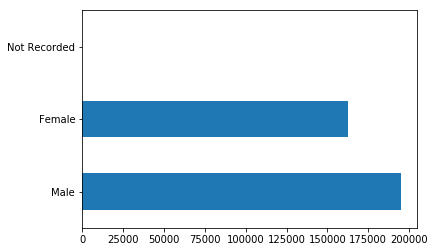

In [11]:
import matplotlib 
%matplotlib inline

df['sex'].value_counts().plot(kind='barh')


In [12]:
df[df.sex != 'Not Recorded']
#this gives you the sex for everybody for whom it is recorded

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,Male,0,NaN,57,NaN,33,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,Male,1,NaN,57,NaN,34,1,1,0,1439,4057,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,Female,0,NaN,71,OTITIS EXTERNA,94,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
3,150717776,06/26/2015,41,15.7762,V,61,Male,0,NaN,71,PAIN,35,1,0,0,611,NaN,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
4,150721694,07/04/2015,42,74.8813,L,88,Female,3,HISPANIC,62,NaN,75,1,0,0,1893,1807,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY
5,150721815,07/02/2015,32,5.6748,C,216,Female,1,NaN,71,DOG SCRATCH/BITE,76,1,1,0,1715,NaN,16 MOF AT HOME PULLED FAMILY DOG-HUSKIES COLLA...,"ND SCRAPING TEETH ON PTS FACE, NOT A TRUE BITE..."
6,150713483,06/08/2015,93,15.7762,V,25,Male,2,NaN,51,NaN,33,4,9,3,1138,NaN,25 YOM WAS CAMPING WHEN FRIEND THREW A PRESSUR...,WHICH FLASHED. FD NS. DX: BURNS L UPPER & LOW...
7,150704114,06/14/2015,56,83.2157,S,53,Male,1,NaN,57,NaN,30,1,0,0,5040,NaN,53 YOM BIKE WRECK SUNDAY PAIN CHEST SHOULDER &...,NaN
8,150736558,07/16/2015,70,83.2157,S,98,Male,2,NaN,59,NaN,76,1,1,0,1807,NaN,98 Y/O M FELL IN FLOOR AND LACERATED FACE,NaN
9,150734928,07/13/2015,51,74.8813,L,48,Female,2,NaN,53,NaN,79,1,5,0,4057,1807,"48 YO F, C/O RT FLANK PAIN 6 DAYS S/P FALL WAS...",ABLE WHICH HIT THE FLOOR STRIKING RT FLANK DX ...


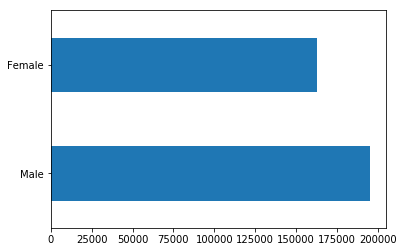

In [13]:
df[df.sex != 'Not Recorded'].sex.value_counts().plot(kind='barh')
#now take the value counts for the remaining ones and plot them.
#filter out the people you don't want/the column values you don't want early on

## "Not recorded" seems silly - change it to be `NaN` instead

Don't use `na_values` for this.

In [14]:
import numpy as np
np.nan


nan

In [15]:
# df['sex']=df['sex'].replace({1:'Male', 2:'Female', 0: None})
df.sex.replace('Not Recorded', np.nan, inplace=True)
df.head()


,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,Male,0,NaN,57,NaN,33,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,Male,1,NaN,57,NaN,34,1,1,0,1439,4057,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,Female,0,NaN,71,OTITIS EXTERNA,94,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
3,150717776,06/26/2015,41,15.7762,V,61,Male,0,NaN,71,PAIN,35,1,0,0,611,NaN,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
4,150721694,07/04/2015,42,74.8813,L,88,Female,3,HISPANIC,62,NaN,75,1,0,0,1893,1807,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY


## Graph the count of men and women, but don’t included the “Not Recorded” records

Yes, again! The code you use should be different this time.

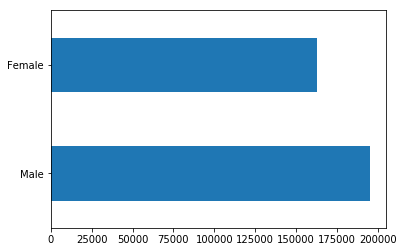

In [16]:
df['sex'].value_counts().plot(kind='barh')

# Wall punching

## Find every instance where the narrative includes punching a wall

Include phrases like "punched a wall" or "punch wall" or "punched ten thousand walls." Do not type them each individually. How do you do that?????

In [17]:
#how do you sort after using groupby?
#.mean().sort_index()
#it'll sort using the index (you could also sort by values)

In [18]:
df.narr1.head()

0    5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...
1    L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...
2    20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...
3    61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...
4    88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...
Name: narr1, dtype: object

In [19]:
wall_punch = df[df['narr1'].str.contains('PUNCH.*WALL.*')]
wall_punch.head()
# punch.*wall.*
#by default, .str.contains knows about regular expressions, so you don't have to import the library
# df.[df['narr1'].str.contains("F[AE].*BI[CK]")] fell off bicycle

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
246,150532226,05/07/2015,63,97.9239,M,38,Male,0,NaN,57,NaN,82,1,0,0,1884,NaN,38YOM PUNCHED A WALL FRACTURED HAND,NaN
582,150954076,09/16/2015,22,15.7762,V,13,Male,1,NaN,57,NaN,82,1,1,0,1884,NaN,"PT PUNCHED A WALL. FRACTURE METACARPAL, RIGHT,...",NaN
604,150541260,04/09/2015,53,15.0591,V,22,Male,1,NaN,71,HAND INJURY,82,1,1,0,1884,NaN,22YOM-HAND INJURY-PUNCHED A CEMENT WALL IN ANG...,NaN
704,151017458,10/05/2015,61,16.5650,V,15,Female,1,NaN,53,NaN,82,1,1,0,1884,NaN,15 YOF C/O RIGHT HAND PAIN SINCE PUNCHING A WA...,DX: CONTUSION OF HAND
741,150433154,04/02/2015,91,15.0591,V,33,Male,1,NaN,57,NaN,82,1,0,0,1884,NaN,33YOM PUNCHED A WALL X1 WEEK AGO W/ SHARP PAIN...,"DX: ACUTE CLOSED FX OF FIFTH METACARPAL, BOXER..."


## Graph the gender distribution of wall-punching.

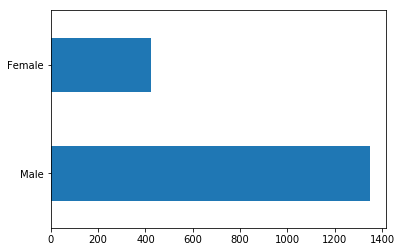

In [20]:
wall_punch['sex'].value_counts().plot(kind='barh')

## Find the average age of a wall-puncher.

Graph the distribution of the ages, too.

In [21]:
wall_punch['age'].describe()

count    1772.000000
mean       24.303612
std         9.694389
min         6.000000
25%        17.000000
50%        22.000000
75%        29.000000
max        69.000000
Name: age, dtype: float64

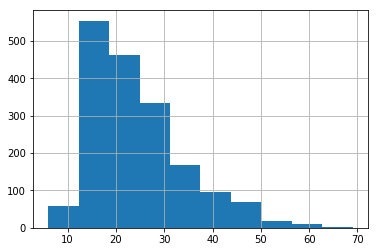

In [22]:
wall_punch['age'].hist()

# Which months are the most popular for wall punching?

The month is hidden inside of the `trmt_date` column - you'll need to extract it. 

In [23]:
wall_punch['month'] = df.trmt_date.str.extract('(\d\d)')
wall_punch.head()
#note that it's taking the first instance, you'd have to escape it using /
#string extract doesn't require importing re
#give me the year, four numbers in a row

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2,month
246,150532226,05/07/2015,63,97.9239,M,38,Male,0,NaN,57,NaN,82,1,0,0,1884,NaN,38YOM PUNCHED A WALL FRACTURED HAND,NaN,05
582,150954076,09/16/2015,22,15.7762,V,13,Male,1,NaN,57,NaN,82,1,1,0,1884,NaN,"PT PUNCHED A WALL. FRACTURE METACARPAL, RIGHT,...",NaN,09
604,150541260,04/09/2015,53,15.0591,V,22,Male,1,NaN,71,HAND INJURY,82,1,1,0,1884,NaN,22YOM-HAND INJURY-PUNCHED A CEMENT WALL IN ANG...,NaN,04
704,151017458,10/05/2015,61,16.5650,V,15,Female,1,NaN,53,NaN,82,1,1,0,1884,NaN,15 YOF C/O RIGHT HAND PAIN SINCE PUNCHING A WA...,DX: CONTUSION OF HAND,10
741,150433154,04/02/2015,91,15.0591,V,33,Male,1,NaN,57,NaN,82,1,0,0,1884,NaN,33YOM PUNCHED A WALL X1 WEEK AGO W/ SHARP PAIN...,"DX: ACUTE CLOSED FX OF FIFTH METACARPAL, BOXER...",04


## Graph the amount of wall punching in each month

Having numbers on the x axis (1-12) is fine.

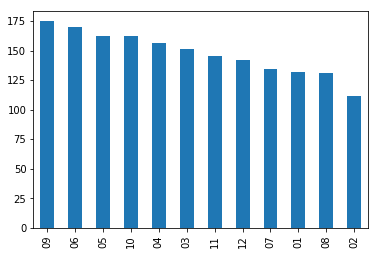

In [24]:
wall_punch['month'].value_counts().plot(kind='bar')

## Sort the graph so that the months are in order from Jan-Dec (or 01-12)

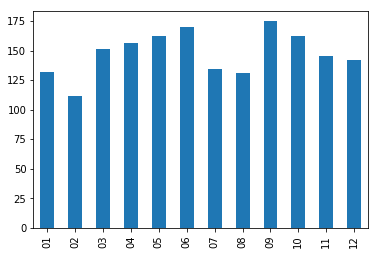

In [25]:
wall_punch['month'].value_counts().sort_index().plot(kind='bar')
#sorts by the index, or the colum on the left hand side

## What month is most common for air conditioner-related injuries?

Use the product code, which you can find in `2017ComparabilityTable.pdf` or `categories-cleaned.txt`.

In [26]:
ac_df = df[df['prod1'] == 381]
ac_df.head()

# df['prod1'].value_counts().sort_index()
#the product code is 0381, but there are no zeros, so it's 381, or you could add leading zeros...

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2


In [27]:
# ac_df['month'].value_counts().sort_index()

## Find what else people punched using the prod1 and prod2 columns.

Look at the top 10 for each separately.

In [28]:
punch_df = df[df['narr1'].str.contains('PUNCH.*', case=False, regex=True)]
punch_df.head()

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
10,150734952,07/04/2015,57,15.7762,V,20,Male,2,NaN,59,NaN,82,1,1,0,1894,NaN,20 YOM DX HAND LACERATION - S/P PT PUNCHED A W...,NaN
38,150508503,05/03/2015,21,15.0591,V,22,Male,0,NaN,53,NaN,82,1,0,0,1893,NaN,"22YM LHD, C/O RT HAND PAIN P PUNCHING A DOOR",>>CONTS
149,150503749,04/02/2015,53,15.0591,V,13,Male,1,NaN,59,NaN,33,1,0,0,1123,NaN,13YOM-FOREARM LAC-PUNCHED A PLASTIC CONTAINER ...,NaN
246,150532226,05/07/2015,63,97.9239,M,38,Male,0,NaN,57,NaN,82,1,0,0,1884,NaN,38YOM PUNCHED A WALL FRACTURED HAND,NaN
385,150741367,07/16/2015,18,5.6748,C,14,Male,2,NaN,59,NaN,34,1,1,0,1894,NaN,14 YOM THREW TANTRUM AND PUNCHED HAND THROUGH ...,RIST.


In [29]:
punch_df['prod1'].value_counts().head(10)

1884    1796
1894     566
1893     244
1207     159
4004     122
276       74
4057      53
1892      48
1726      42
1807      41
Name: prod1, dtype: int64

In [30]:
punch_df['prod2'].value_counts().head(10)

1884    31
1893    13
1807     7
1207     7
4056     6
1892     6
604      4
1865     4
676      3
1819     3
Name: prod2, dtype: int64

## Uh, they're the same!

The order of `prod1` and `prod2` don't actually matter!

> When only one product is associated with an injury, place the product code for that product in the space allocated for "First Product Code" and fill in the "Second Product Code" spaces with 4 zeros (0000).
When two products are associated with an injury, either product may be coded as the first product and the other as the second product.
>
> Example: An 11-year old boy riding a bicycle ran into a swing. Code: Product 1 = 5040 (bicycle) and Product 2 = 3246 (swings) or
>
> Code: Product 1 = 3246 (swings) and Product 2 = 5040 (bicycle)

## Okay, okay, there’s no difference between prod1 and prod2, so you should add their frequencies together for an overall count!

It's *almost* as easy as adding together the `value_counts()`.

Take a look at the air conditioner question and the `.value_counts()` you just did, though, to see why combining them might not be that simple. **What is different about `prod1` and `prod2`?** You probably have to go all the way back up to where you read the file in to make them match.

In [31]:
#they're different data types
punch_df.dtypes

CPSC Case #      int64
trmt_date       object
psu              int64
weight         float64
stratum         object
age              int64
sex             object
race             int64
race_other      object
diag             int64
diag_other      object
body_part        int64
disposition      int64
location         int64
fmv              int64
prod1           object
prod2           object
narr1           object
narr2           object
dtype: object

df.race_other.replace('UNKN','UNKNOWN')
df[df.race_other.str.contains('UN.*N', na=False)]['race_other'].value_counts()

df[df.race_other.str.replace('UN.*N', 'UNKNOWN')]['race_other'].value_counts()


In [32]:
punch_df['prod2'].value_counts().head(10)

1884    31
1893    13
1807     7
1207     7
4056     6
1892     6
604      4
1865     4
676      3
1819     3
Name: prod2, dtype: int64

In [33]:
punch_df['prod1'].value_counts().head(10)

1884    1796
1894     566
1893     244
1207     159
4004     122
276       74
4057      53
1892      48
1726      42
1807      41
Name: prod1, dtype: int64

In [34]:
sum_punch = (punch_df['prod2'].value_counts().head(10) + punch_df['prod2'].value_counts().head(10)).sort_values(ascending=False)
sum_punch.head()

1884    62
1893    26
1207    14
1807    14
1892    12
Name: prod2, dtype: int64

## Turn that into a dataframe

Use `.reset_index()` on the result to turn it into a dataframe. Rename your columns to be `product_code` and `injury_count`.

In [35]:
sum_punch_df = sum_punch.reset_index()
sum_punch_df.head()

,index,prod2
0,1884,62
1,1893,26
2,1207,14
3,1807,14
4,1892,12


In [36]:
sum_punch_df.rename(columns = {sum_punch_df.columns[0] : 'injury count'}, inplace=True)
sum_punch_df.head()

# df = df.rename(columns = {df.columns[-1] : 'newname'})


,injury count,prod2
0,1884,62
1,1893,26
2,1207,14
3,1807,14
4,1892,12


In [37]:
sum_punch_df.rename(columns = {sum_punch_df.columns[1] : 'product code'}, inplace=True)
sum_punch_df.head()

,injury count,product code
0,1884,62
1,1893,26
2,1207,14
3,1807,14
4,1892,12


## Fix the product codes

Uh, wait, look at those product codes. "102" shouldn't be possible, it should be `0102` - this actually doesn't have to do with coding, it has to do with *the data doesn't match the codebook*.

### Add zeroes to the left of the product code until it is 4 characters long

In [38]:
### adding leading zeros! pad the column and then add the number of characters you want
df.prod1.str.pad(4, fillchar='0')
#NOTE you first have to convert prod1 to a string in your OG dataframe

0         1267
1         1439
2         3274
3         0611
4         1893
5         1715
6         1138
7         5040
8         1807
9         4057
10        1894
11        1267
12        3274
13        1807
14        4057
15        0894
16        1817
17        0380
18        4014
19        0474
20        0676
21        5036
22        1239
23        1329
24        0611
25        0679
26        1884
27        3274
28        4076
29        1211
          ... 
357697    5017
357698    1616
357699    1426
357700    4076
357701    4014
357702    1233
357703    1807
357704    3262
357705    3286
357706    1871
357707    0676
357708    0464
357709    0836
357710    1205
357711    4076
357712    1807
357713    1936
357714    1842
357715    3216
357716    1913
357717    1616
357718    1522
357719    1616
357720    1807
357721    1301
357722    1864
357723    1931
357724    3250
357725    0464
357726    3273
Name: prod1, Length: 357727, dtype: object

## Get meaningful names for "product code"

Join with `categories-cleaned.txt` to turn the codes into actual words. **When you read in `categories-cleaned.txt`, make sure it has 803 rows and 2 columns.**

In [64]:
import pandas as pd 
cat_clean = pd.read_csv('categories-cleaned.txt')

cat_clean.head()

,prod,Device
0,102,Wringer washing machines
1,106,Electric clothes dryers without washers
2,107,Gas clothes dryers without washers
3,110,Electric heating pads
4,112,Sewing machines or accessories


In [65]:
cat_clean.shape

(803, 2)

In [69]:
df.join(cat_clean, on='prod1')


,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,...,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2,prod,Device
0,150733174,07/11/2015,38,15.7762,V,5,Male,0,NaN,57,...,33,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT,NaN,NaN
1,150734723,07/06/2015,43,83.2157,S,36,Male,1,NaN,57,...,34,1,1,0,1439,4057,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...,NaN,NaN
2,150817487,08/02/2015,51,74.8813,L,20,Female,0,NaN,71,...,94,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...,NaN,NaN
3,150717776,06/26/2015,41,15.7762,V,61,Male,0,NaN,71,...,35,1,0,0,611,NaN,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN,NaN,NaN
4,150721694,07/04/2015,42,74.8813,L,88,Female,3,HISPANIC,62,...,75,1,0,0,1893,1807,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY,NaN,NaN
5,150721815,07/02/2015,32,5.6748,C,216,Female,1,NaN,71,...,76,1,1,0,1715,NaN,16 MOF AT HOME PULLED FAMILY DOG-HUSKIES COLLA...,"ND SCRAPING TEETH ON PTS FACE, NOT A TRUE BITE...",NaN,NaN
6,150713483,06/08/2015,93,15.7762,V,25,Male,2,NaN,51,...,33,4,9,3,1138,NaN,25 YOM WAS CAMPING WHEN FRIEND THREW A PRESSUR...,WHICH FLASHED. FD NS. DX: BURNS L UPPER & LOW...,NaN,NaN
7,150704114,06/14/2015,56,83.2157,S,53,Male,1,NaN,57,...,30,1,0,0,5040,NaN,53 YOM BIKE WRECK SUNDAY PAIN CHEST SHOULDER &...,NaN,NaN,NaN
8,150736558,07/16/2015,70,83.2157,S,98,Male,2,NaN,59,...,76,1,1,0,1807,NaN,98 Y/O M FELL IN FLOOR AND LACERATED FACE,NaN,NaN,NaN
9,150734928,07/13/2015,51,74.8813,L,48,Female,2,NaN,53,...,79,1,5,0,4057,1807,"48 YO F, C/O RT FLANK PAIN 6 DAYS S/P FALL WAS...",ABLE WHICH HIT THE FLOOR STRIKING RT FLANK DX ...,NaN,NaN


In [46]:
# #to find a list of products
# df.prod1.isin(['1232','12433','46436','123'])

### Confirm that it worked by seeing if product code '0102' gives you 'Wringer washing machines"

In [42]:
df[df.prod1.isin(['0102'])]

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2


## Graph the top 10 most popular products for injuries 